Τεχνικές Εξόρυξης Δεδομένων - 1η άσκηση

1115201600046 ΕΛΛΗΝΑ ΚΩΝΣΤΑΝΤΙΝΑ & 1115201600071 ΚΟΛΙΟΥ ΣΤΑΥΡΟΥΛΑ

In [1]:
#Import the libraries needed.

import os
import pandas as pd
from pandas import DataFrame, read_csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud, STOPWORDS
import folium
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
import string
from nltk.collocations import *

In [2]:
Location = r'/home/konnaell/Desktop/TED/train.csv'
train = pd.read_csv(Location, header = 0, low_memory = False)
#We make train2 which is a csv file with exactly the columns needed(id, Name, Description)
train2 = train.loc[:, ['id', 'Name', 'Description']]

#We concatenate the columns Name and Description in one column and we fill the NULL parts with NA.
train2['Name-Description'] = train2['Name'] + ' - ' + train2['Description']
train2.fillna(value = 'NA')
train2 = train2.drop_duplicates(subset='id', keep='first', ignore_index=True)
#We made the train2.csv file so we can see the whole file
train2.to_csv('train2.csv', sep=',')

[("'the", 64343), ("'and", 55095), ("'of", 33219), ("'is", 30118), ("'to", 28065), ("'in", 24747), ("'with", 23066), ("'apartment", 16585), ("'The", 15371), ("'you", 13972), ("'Athens", 13690), ("'from", 12973), ("'for", 12155), ("''", 8598), ('``', 8348), ("'can", 7959), ("'room", 7414), ("'are", 7216), ("'Acropolis", 6861), ("'on", 6603), ("'bed", 6562), ("'all", 6530), ("'It", 6435), ("'kitchen", 6399), ("'has", 5925), ("'your", 5894), ("'metro", 5553), ("'located", 5294), ("'station", 5294), ("'fully", 5271), ("'-", 5254), ("'one", 5248), ("'area", 5191), ("'at", 5023), ("'equipped", 4992), ("'floor", 4902), ('2', 4898), ("'living", 4877), ("'or", 4840), ("'as", 4759), ("'will", 4664), ("'walk", 4479), ("'city", 4457), ("'by", 4428), ("'minutes", 4393), ("'bathroom", 4356), ("'bedroom", 4303), ("'an", 4254), ("'center", 4250), ("'very", 4222)]


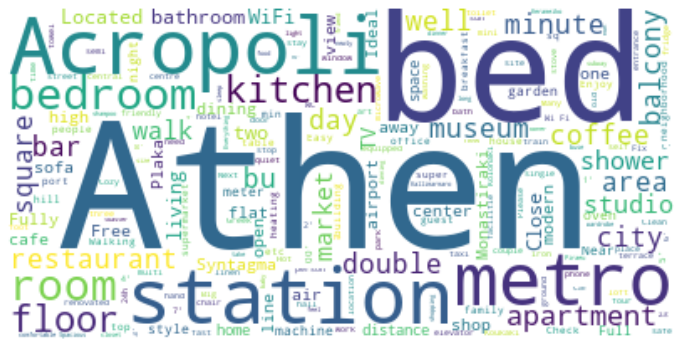

In [3]:
#We tokenize each description and we save every word in a list.
text2 = train2['Description'].values
all_words = []
for i in range(len(text2)):
    all_words.extend(word_tokenize(str(text2[i])))

#We remove the punctuation and the stopwords and we save to "final" the words that we want to count.
word_tokens = word_tokenize(str(all_words)) 
filtered_sentence = [w for w in word_tokens if not w in STOPWORDS] 

final = [] 
punctuations = '''!()-[]{};:'"\,<>./?@#^&*_~'''

for w in filtered_sentence: 
    if w not in STOPWORDS:
        if w not in punctuations:
            final.append(w) 

#We count how many times the words are shown and we choose the 50 most common ones.
count = Counter(final)
print(count.most_common(50))

#And we show the wordcloud for text2.
wordcloud = WordCloud(background_color = 'white', stopwords = STOPWORDS).generate(str(count))
fig = plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

##                                            QUESTION no1

In [3]:
#We use TfidfVectorizer to make an array of unigrams and bigrams.
df1 = train2['Name-Description']
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features = 1000)
tf = vect.fit_transform(df1.values.astype('U'))
array = tf.toarray()
print(array)

#And we saved it to a csv file so we can see the all the results shown.
pd.DataFrame(array).to_csv("tf_idf.csv", index=False, header=False, sep=";")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## QUESTION no2

In [36]:
#We use the cosine_similarity to find the similarity among the houses and we subtract the diagonal.
cos = cosine_similarity(array)
cos = cos - np.eye(cos.shape[0])

#We find the maximum of cos and we save the indexes to x,y. We save the maximum to max_value.
#We save the ids to max_id1 and max_id2. The dictionary shows the 2 ids that we compare and the score of them.
#Finally, we eliminate the score so the next loop will take the next maximum. We also eliminate the symmetrical
#score, because the array of similarities is symmetrical.
dictionary = {}
for i in range(100):
    x, y = np.unravel_index(np.argmax(cos, axis=None), cos.shape)
    max_value = cos[x,y]
    max_id1 = train2.loc[x]['id']
    max_id2 = train2.loc[y]['id']
    dictionary[f'{max_id1}-{max_id2}'] = max_value
    cos[x,y] = 0
    cos[y,x] = 0
dictionary

{'21195111-21402471': 1.0000000000000007,
 '21195111-22155481': 1.0000000000000007,
 '21402471-22155481': 1.0000000000000007,
 '22074774-22074946': 1.0000000000000007,
 '22074774-22075076': 1.0000000000000007,
 '22074946-22075076': 1.0000000000000007,
 '21618154-21618159': 1.0000000000000004,
 '21618154-21618263': 1.0000000000000004,
 '21618154-21618310': 1.0000000000000004,
 '21618154-21618466': 1.0000000000000004,
 '21618159-21618263': 1.0000000000000004,
 '21618159-21618310': 1.0000000000000004,
 '21618159-21618466': 1.0000000000000004,
 '21618263-21618310': 1.0000000000000004,
 '21618263-21618466': 1.0000000000000004,
 '21618310-21618466': 1.0000000000000004,
 '25941499-25941657': 1.0000000000000004,
 '25941499-25941675': 1.0000000000000004,
 '25941499-26092250': 1.0000000000000004,
 '25941657-25941675': 1.0000000000000004,
 '25941657-26092250': 1.0000000000000004,
 '25941675-26092250': 1.0000000000000004,
 '32592712-32592916': 1.0000000000000004,
 '32592712-32593025': 1.0000000000

## QUESTION no3

In [5]:
#We use the cosine_similarity to find the similarity among the houses and we subtract the diagonal.
cos = cosine_similarity(array)
cos = cos - np.eye(cos.shape[0])

#In the function we choose from all the ids the one that we will process. We find all the ids in this line
#and we make a dictionary which has the id given and the num maximum of ids that are similar with their score.
#Finally, we print the requested questions.
def recommend(item_id, num):
    dictionary = {}
    print("Recommending ",num," listings similar to ",item_id) 
    print("\n")
    for j in range(cos.shape[0]):
        if(item_id == train2.loc[j]['id']):
            line = cos[j,:]
            current_id = item_id
            dictionary[str(current_id)] = []
            for i in range(num):
                x = np.argmax(line, axis=None)
                max_value = line[x]
                max_id = train2.loc[x]['id']
                dictionary[str(current_id)].append((str(max_id), max_value))
                df=train2[train2['id']==max_id]
                print('id:',df['id'].to_string(index=False))
                print('NAME:',df['Name'].to_string(index=False))
                print('DESCRIPTION:',df['Description'].to_string(index=False))
                print("(score:",max_value,")")
        
                line[x] = 0
                print("\n")
    return dictionary

recommend(38100,5)

Recommending  5  listings similar to  38100


id:  12266573
NAME:  comfortable apartment in Athens
DESCRIPTION:  apartment in the center of Athens with view of...
(score: 0.4901271841613315 )


id:  26187324
NAME:  Cozy apartment in the center of Athens!!!
DESCRIPTION:  The house is located in the center of Athens. ...
(score: 0.4613523759135358 )


id:  26804619
NAME:  Cebes - premium apartment - Athens historic ce...
DESCRIPTION:  Experience the culture like a local. A New lux...
(score: 0.41921917336103487 )


id:  19435637
NAME:  Artistic penthouse at the center of Athens
DESCRIPTION:  Do you like art? Do you enjoy the sun? If yes,...
(score: 0.4013037373840642 )


id:  32791704
NAME:  Nice cosy apartment in central neighborhood
DESCRIPTION:  A nice,very well situated apartment,very close...
(score: 0.39460772641204306 )




{'38100': [('12266573', 0.4901271841613315),
  ('26187324', 0.4613523759135358),
  ('26804619', 0.41921917336103487),
  ('19435637', 0.4013037373840642),
  ('32791704', 0.39460772641204306)]}

## QUESTION no4

In [6]:
#We tokenize each value of 'Name-Description' column and we save every word in a list.
text = train2['Name-Description'].values
ΝΜ = []
for i in range(len(text)):
    ΝΜ.extend(word_tokenize(str(text[i])))

#We remove the punctuation and the stopwords and we save to "final" the words that we want to process.
final = []
punctuations = '''!()-[]{};:'"\,<>./?@#^&*_~'''

for w in ΝΜ: 
    if w not in punctuations:
        if w not in STOPWORDS:
            final.append(w) 

#With BigramCollocationFinder we find 10 pairs that are the most frequent in the column.
bigram = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(final)
frequency = finder.ngram_fd.items()
Table = pd.DataFrame(list(frequency), columns=['Words','Frequency']).sort_values(by='Frequency', ascending=False)
Table.head(10)

,Words,Frequency
338,"(The, apartment)",4445
185,"(living, room)",4069
350,"(fully, equipped)",3168
17,"(metro, station)",2923
875,"(double, bed)",2480
795,"(walking, distance)",2397
1587,"(center, Athens)",2040
674,"(heart, Athens)",1924
51,"(equipped, kitchen)",1873
1682,"(apartment, located)",1420
